In [1]:
import pandas as pd
import requests

In [2]:
pd.options.display.max_columns = None

In [3]:
import sys
sys.path.append("../")

In [4]:
import src.main as sp

In [5]:
df = sp.abrir_csv("../data/df_spotify_limpio.csv")

In [6]:
df.head(1)

,Song_Name,Genre,Subgenre,Subgenre_2,Release_Date,Song_Decade,Streams,Week_Of_Highest_Charting,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Artist,Artist_Followers,Gender,Artist_Generation,Type,Country
0,UGH!,pop,k-pop,k-pop boy group,2020-02-21,2020s,"9,991,177",2020-02-21,February,Winter,2020,72.0,0.72,0.824,-5.086,0.128,0.0394,0.0509,165.998,225012.0,0.333,A#/Bb,BTS,37151476,mixed,Generation Z,group,KR


In [7]:
df.shape

(1114, 28)

In [8]:
df_api=df[["Artist","Gender"]]
df_api=df_api.drop_duplicates(keep='first')

In [9]:
artistas=df_api["Artist"]

In [10]:
artistas

0                           BTS
1                  Lil Uzi Vert
2                         Drake
3            Tyler, The Creator
4                Paul McCartney
                 ...           
1096                     Tiësto
1101    Daryl Hall & John Oates
1102               The Ronettes
1104                   Band Aid
1108                   Galantis
Name: Artist, Length: 320, dtype: object

In [12]:
import os 
from dotenv import load_dotenv

load_dotenv()

True

In [21]:
my_token = os.getenv("token")

In [19]:
def request_ticketmaster_spoti2(artistas, my_token): 
    events=[]
    token= my_token
    url = "https://app.ticketmaster.com/discovery/v2/events/"
    for artist in artistas:
        params = {"keyword": artist,
               "apikey":token}   
        res = requests.get(url,params=params)
        if res.status_code == 200:
            data = res.json()
        else:
            print(f"Tenemos un problema en el video {event}")
        artist = artist
        try:
            event1=data['_embedded']['events'][0]
            event_name = event1['name']
            event_url = event1['url']
            event_city= event1["_embedded"]['venues'][0]['city']["name"]
            event_country= event1["_embedded"]['venues'][0]['country']["name"]
            event_location= event1["_embedded"]['venues'][0]['location']
            events.append({'Artist': artist, 'Event_Name': event_name, 'url': event_url, "Country": event_country, "City":event_city, "Location": event_location})
        except:
            events.append({'Artist': artist, 'Event_Name': "No events", 'url': "-", "Country": "-", "City":"-", "Location": "-"})

    return events

In [22]:
Api=request_ticketmaster_spoti2(artistas, my_token)

In [23]:
df_api=pd.DataFrame(Api)
df_api.head(1)

,Artist,Event_Name,url,Country,City,Location
0,BTS,BTS 14-17 Party,https://www.ticketmaster.co.uk/bts-1417-party-...,Great Britain,London,"{'longitude': '-0.10661535', 'latitude': '51.5..."


In [24]:
df_api.shape

(320, 6)

In [27]:
loc=df_api["Location"][1]
type(loc) #lets expand for the coordenates 

dict

In [28]:
list_loc=df_api["Location"].tolist()

In [29]:
dict_loc=[]
for i in list_loc:
    try:
        Longitud=i['longitude']
        Latitud=i['latitude']
        dict_loc.append({"Location":i, 'Longitude':Longitud, 'Latitude':Latitud})
    except:
        dict_loc.append({"Location":i, 'Longitude':i, 'Latitude':i})
df_loc=pd.DataFrame(dict_loc)

In [30]:
df_loc.head(1) 

,Location,Longitude,Latitude
0,"{'longitude': '-0.10661535', 'latitude': '51.5...",-0.10661535,51.53445948


In [31]:
df_api2=pd.concat([df_api, df_loc], axis=1)

In [34]:
df_api2.rename(columns = {"Country": "Event_Country"}, inplace = True)
df_api2.rename(columns = {"City": "Event_City"}, inplace = True)
df_api2.rename(columns = {"Longitude": "Event_Longitude"}, inplace = True)
df_api2.rename(columns = {"Latitude": "Event_Latitude"}, inplace = True)

In [33]:
df_api2.drop(["Location"], axis=1, inplace=True)

In [35]:
df_api2.head(1)

,Artist,Event_Name,url,Event_Country,Event_City,Event_Longitude,Event_Latitude
0,BTS,BTS 14-17 Party,https://www.ticketmaster.co.uk/bts-1417-party-...,Great Britain,London,-0.10661535,51.53445948


In [ ]:
df_api2.to_csv("data/df_api_ticketmaster.csv")

Now lets merge both dataframes

In [36]:
df.shape

(1114, 28)

In [37]:
df=pd.merge(df, df_api2, on='Artist', how='left')

In [38]:
df.head(1)

,Song_Name,Genre,Subgenre,Subgenre_2,Release_Date,Song_Decade,Streams,Week_Of_Highest_Charting,Month_Highest_Charting,Season_Highest_Charting,Year_Highest_Charting,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(Ms),Valence,Chord,Artist,Artist_Followers,Gender,Artist_Generation,Type,Country,Event_Name,url,Event_Country,Event_City,Event_Longitude,Event_Latitude
0,UGH!,pop,k-pop,k-pop boy group,2020-02-21,2020s,"9,991,177",2020-02-21,February,Winter,2020,72.0,0.72,0.824,-5.086,0.128,0.0394,0.0509,165.998,225012.0,0.333,A#/Bb,BTS,37151476,mixed,Generation Z,group,KR,BTS 14-17 Party,https://www.ticketmaster.co.uk/bts-1417-party-...,Great Britain,London,-0.10661535,51.53445948


In [ ]:
df.to_csv("../data/df_spotify_limpio_completo.csv")

In [72]:
df=sp.abrir_csv("../data/df_spotify_limpio_completo.csv")

In [73]:
df.shape

(1114, 34)

**WHERE ARE LOCATED THE EVENTS THAT I AM GOING TO ADD TO MY DATAFRAME?**

In [39]:
import folium

In [40]:
df_map=df_loc[df_loc["Latitude"]!="-"] #lets exclude those lines that do not have an event

In [57]:
mapa = folium.Map()

In [58]:
def mapa(df, latitude, longitud, location):
    mapa = folium.Map()
    for index, row in df_map.iterrows():
        folium.Marker([row[latitude], row[longitud]],
                      radius=5, 
                      tooltip = row[location],
                      icon=folium.Icon(color='purple', icon='cloud')).add_to(mapa)
    return mapa

In [62]:
mapa=sp.mapa(df_map, "Latitude", "Longitude", "Location")

In [63]:
mapa.save(outfile= '../images/mapa_events.html')

In [64]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import warnings
warnings.filterwarnings('ignore')

opciones= Options()
opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)
opciones.add_argument('--start-maximized') 
opciones.add_argument('user.data-dir=selenium')
opciones.add_argument('--incognito')

In [68]:
driver = webdriver.Chrome(chrome_options=opciones, executable_path='path/to/chromedriver')
driver.get("file:///C:/Users/egcmo/ironhack/ETL_project/images/mapa_events.html")
driver.save_screenshot("../images/mapa_events.png")
driver.quit()

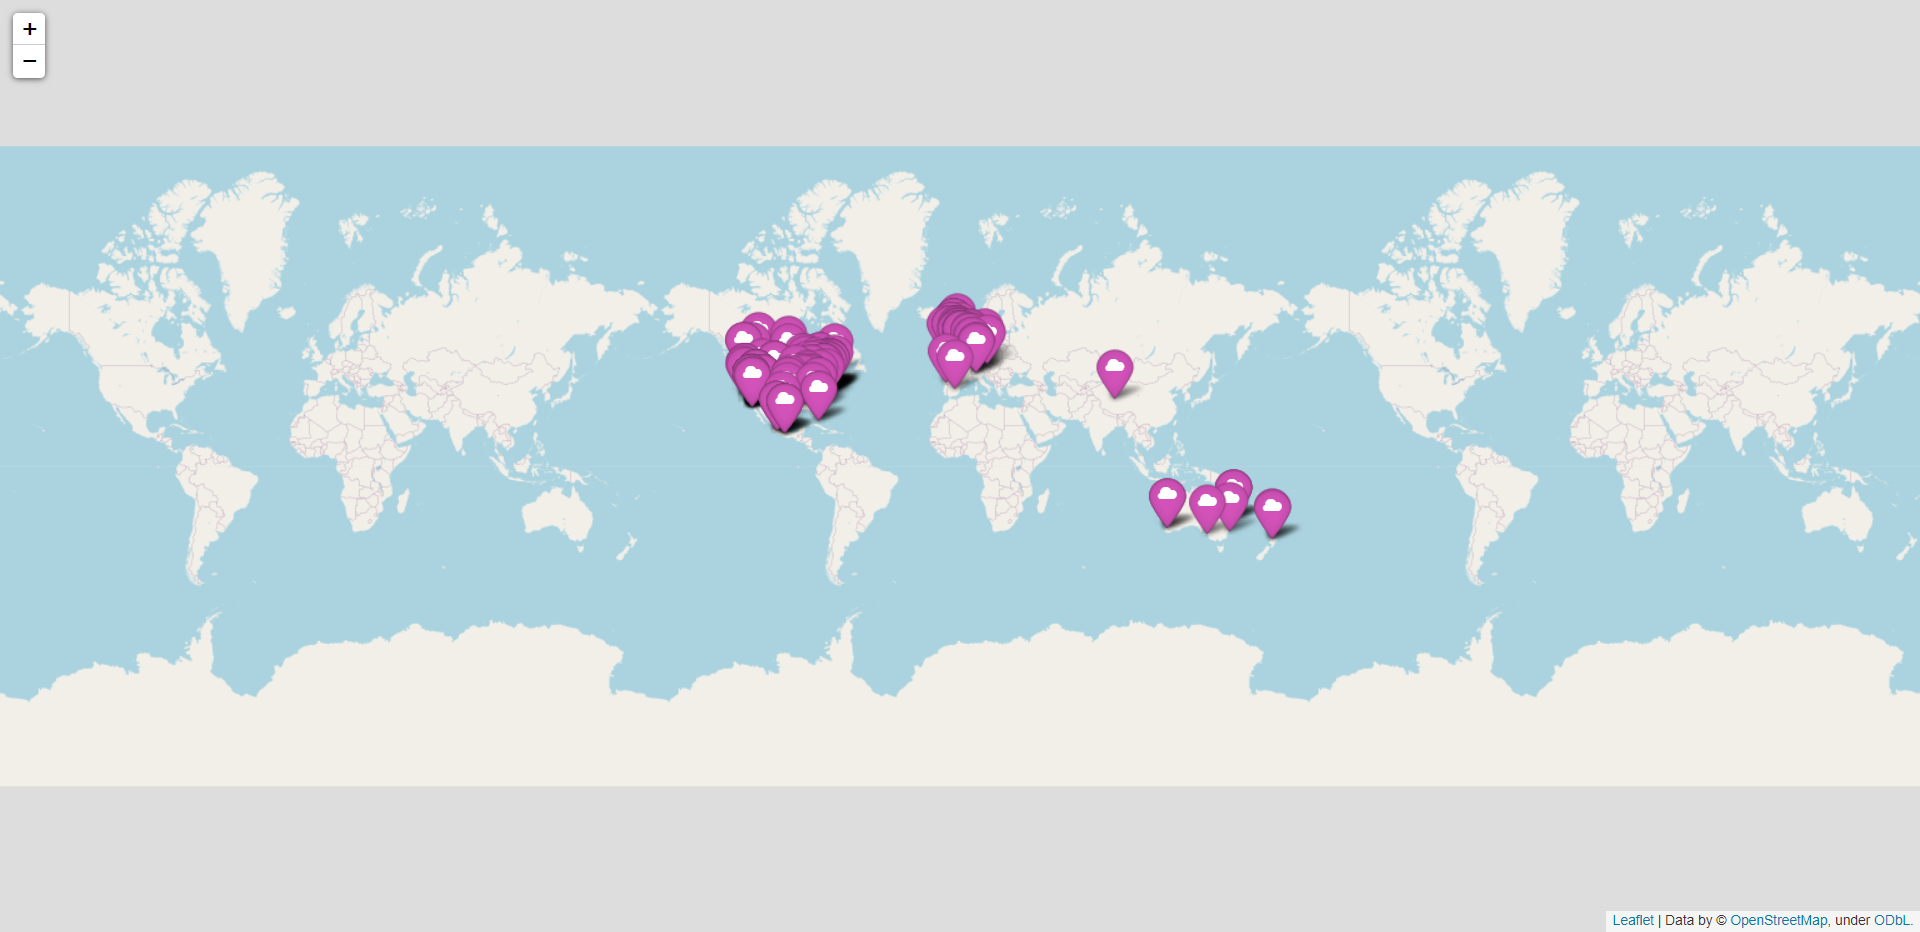

In [70]:
from IPython.display import Image
Image(filename='../images/mapa_events.png')